In [1]:
from __future__ import division
import imp
import uproot
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os
import ROOT
import time
import math
import collections
from array import array

inputdir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
outputdir = inputdir+'xsec_detsys_WireModX/' 
output_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX/'
input_filedir = '/home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/'
lib_function_dir = '/home/tmettler/Desktop/uBoone/do_plots/'

# helper functions
globale = imp.load_source('globale',lib_function_dir+'globale.py')
NuCC = imp.load_source('NuCC_function',lib_function_dir+'NuCC_function.py')
NuCC_w = imp.load_source('NuCCWeight_function',lib_function_dir+'NuCCWeight_function.py')


Welcome to JupyROOT 6.10/08


In [2]:
#!jupyter nbconvert --to script numuCCana_muon_cut_weight.ipynb

In [3]:
# initialte ROOT default canvas
#ROOT.gROOT.SetBatch(ROOT.kFALSE)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetOptTitle(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


# CRTinBNB tagger, Overlay or MC

In [4]:
# Load input files
outputdir_png, outputdir_root = NuCC.prepareOutput(outputdir)
try:
    os.stat(output_filedir)
except:
    os.mkdir(output_filedir)
#RootFile = ROOT.TFile(output_filedir+"xsec_detsys_WireModX.root","RECREATE");

#filename_overlay = 'NuCCana_overlay_V26_weight.root'
filename_overlay = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_WireModX.root'
filename_data = 'NuCCana_data_V22.root'
filename_ext = 'NuCCana_ext_V25.root'
filename_dirt = 'NuCCana_dirt_V26_weight.root'

#additional detector variation file
filename_detsys = 'detector_variation_reweight/NuCCana_ovleray_detsys_reweight_WireModX.root'

tree_name = 'numuCCAna'

In [5]:
#Open all the trees of the four files (data, ext, dirt, overlay)

data, ext, dirt, overlay = NuCC.openTrees(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
NuCC.printNumberOfEntries(data,ext,dirt,overlay)

pot_overlay = NuCC.getPOT(inputdir,filename_overlay,tree_name)
pot_dirt =  NuCC.getPOT(inputdir,filename_dirt,tree_name)
#V25 files
pot_data =     8.649e+18  # best with tor875
data_trigger = 1854495.0 #4743794 # 1987072.0 # E1DCNT_wcut
ext_trigger =  18997529.0  #2120135 #5685315 # EXT

print 'POT: '
print 'Data:\t\t', pot_data
print 'Ext:\t\t', 0
print 'Overlay:\t', pot_overlay
print 'Dirt:\t\t', pot_dirt
print ''

#filename_detsys = filename_detsys+'out33.root'
detsys = ROOT.TChain(tree_name+ "/event","event")
detsys.Add( inputdir + filename_detsys)
pot_detsys = NuCC.getPOT(inputdir,filename_detsys,tree_name)

pot_overlay = pot_overlay
sample = [data,ext,overlay,dirt,detsys]
scale = {data:1.0,ext:1.0,overlay:1.0,dirt:1.0,detsys:1.0}
name = {data:'data',ext:'ext',overlay:'overlay',dirt:'dirt',detsys:'detsys'}
scale[data], scale[ext], scale[dirt], scale[overlay] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
scale[dirt] = scale[dirt]
scale[overlay] = scale[overlay]
scale_detsys = pot_data/pot_detsys
scale[detsys] = scale_detsys
print 'Detsys POT:', pot_detsys, ' Scale: ', scale_detsys
print 'Scalefactors: '
print 'Data:\t\t', scale[data]
print 'Ext:\t\t', scale[ext]
print 'Overlay:\t', scale[overlay]
print 'Dirt:\t\t', scale[dirt]


Overlay: Number of Entries:	90512
Data: Number of Entries:	33178
Ext: Number of Entries:		222702
Dirt: Number of Entries:	40808

POT: 
Data:		8.649e+18
Ext:		0
Overlay:	1.12265011704e+20
Dirt:		1.25019694173e+20

Detsys POT: 1.12265011704e+20  Scale:  0.077040921911
Scalefactors: 
Data:		1.0
Ext:		0.0976176954382
Overlay:	0.077040921911
Dirt:		0.0691811002835


Warning in <TClass::Init>: no dictionary for class ROOT::TIOFeatures is available


In [6]:
if 1:
    filename_overlay = filename_overlay+'out33.root'
    #filename_overlay = 'NuCCana_overlay_points_1kev.rootout2.root'
    filename_data = filename_data+'out33.root'
    filename_ext = filename_ext+'out33.root'
    filename_dirt = filename_dirt+'out33.root'

    tree_name = 't_out'
    
    filename_detsys = filename_detsys+'out33.root'
    detsys_out = ROOT.TChain(tree_name,"t_out")
    detsys_out.Add( inputdir + filename_detsys)
    print "Detsys: Number of Entries:\t", detsys_out.GetEntries()

    data_out, ext_out, dirt_out, overlay_out = NuCC.openTreesOut(inputdir, filename_data, filename_ext, filename_dirt, filename_overlay, tree_name)
    NuCC.printNumberOfEntries(data_out,ext_out,dirt_out,overlay_out)

    sample_out = [data_out,ext_out,overlay_out,dirt_out, detsys_out]
    scale_out = {data_out:1.0,ext_out:1.0,overlay_out:1.0,dirt_out:1.0, detsys_out:1.0}
    name_out = {data_out:'data',ext_out:'ext',overlay_out:'overlay',dirt_out:'dirt',detsys_out:'detsys'}

    scale_out[data_out], scale_out[ext_out], scale_out[dirt_out], scale_out[overlay_out] = NuCC.calculateScale(data_trigger, ext_trigger, pot_data, pot_dirt, pot_overlay)
    scale_out[dirt_out] = scale_out[dirt_out]
    scale_out[overlay_out] = scale_out[overlay_out]
    scale_out[detsys_out] = scale_detsys

Detsys: Number of Entries:	90508
Overlay: Number of Entries:	90508
Data: Number of Entries:	33177
Ext: Number of Entries:		222701
Dirt: Number of Entries:	40807



In [7]:
##### flux and number of tragets parameters###
flux = 1.16859e11/1.592e20 # flux per POT per cm2
roh_data = 1.3836 #data denisity g/cm3
roh_MC = 1.3954 # MC denisity g/cm3
mol = 39.95 # g for argon
N_A = 6.022140857e23 # molec/mol avogadro zahl
N_nucleons = 40.0
V_fid = ((254.8-10)-(-1.55+10))*((117.47-10)-(-115.53+10))*((1036.9-50)-(-0.1+10))
print 'Fiducial Volume: ', V_fid
##############################################

beam_flux = flux * pot_data
print 'Beam flux = {:.5e}'.format(beam_flux),' /cm2'
N_tot = roh_data*N_A*N_nucleons*V_fid/mol
print 'Number of target nuclei= {:.5e}'.format(N_tot),' /cm3'

Fiducial Volume:  49184671.35
Beam flux = 6.34870e+09  /cm2
Number of target nuclei= 4.10331e+31  /cm3


In [8]:
# Define signals

fidVol = '(Nu_Vx_sce>(-1.55+10) && Nu_Vx_sce<(254.8-10)) && (Nu_Vy_sce>(-115.53+10) && Nu_Vy_sce<(117.47-10)) &&(Nu_Vz_sce>(-0.1+10) && Nu_Vz_sce<(1036.9-50))'
MCfidVol = '(MCNu_Vx>(-1.55+10) && MCNu_Vx<(254.8-10)) && (MCNu_Vy>(-115.53+10) && MCNu_Vy<(117.47-10)) &&(MCNu_Vz>(-0.1+10) && MCNu_Vz<(1036.9-50))'
numu_signal = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG==13 && MCTrackPurity>0.5' # numu CC signal definition
numu_true = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14' # numu CC signal definition
numu_nomu = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPDG!=13 && MCTrackPurity>0.5' # not an MC muon
numu_lowpur = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14 && MCTrackPurity<0.5' #low purity
numu_nc = 'fidVol && MCfidVol && MCNu_CCNC==1' # nutral current
numu_ov = 'fidVol && !MCfidVol' # out of fiducial
numu_other = 'fidVol && MCfidVol && MCNu_CCNC==0 && MCNu_PDG!=14' # e.g anti nu or nue
#signal = 'MCfidVol && MCNu_CCNC==0 && MCNu_PDG==14'
for x in sample:
    x.SetAlias('muon','(muon_candidate_key==track_key)')
    
num_fidVol = {}
for x in sample:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)
    num_fidVol[x] = x.GetEntries('fidVol && muon')*scale[x]
    
tot_num_fidVol = num_fidVol[ext]+num_fidVol[dirt]+num_fidVol[overlay]
overlay_signals = {'numu_signal','numu_nomu','numu_lowpur','numu_nc','numu_ov','numu_other'}

In [9]:
for x in sample_out:
    x.SetAlias('muon','(track_key == key_muon)')

num_fidVol = {}
for x in sample_out:
    x.SetAlias('fidVol',fidVol)
    x.SetAlias('MCfidVol',MCfidVol)
    x.SetAlias('numu_signal',numu_signal)
    x.SetAlias('numu_true',numu_true)
    x.SetAlias('numu_nomu',numu_nomu)
    x.SetAlias('numu_lowpur',numu_lowpur)
    x.SetAlias('numu_nc',numu_nc)
    x.SetAlias('numu_ov',numu_ov)
    x.SetAlias('numu_other',numu_other)

In [10]:
# Load the global variables for access of functions
NuCC.loadGlobal(data,ext,dirt,overlay,data_out,ext_out,dirt_out,overlay_out,scale,scale_out,tot_num_fidVol,overlay_signals,sample,sample_out, name,name_out, outputdir_png, outputdir_root)
#NuCC.printGlobal()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


In [11]:
# initialte ROOT default canvas
ROOT.gStyle.SetOptStat(0)
c1 = ROOT.TCanvas("c1","c1",1600,1200)
c1.SetGrid(1)
c1.SetLeftMargin(0.14)
c1.SetRightMargin(0.18)
c1.SetBottomMargin(0.14)

In [12]:
track_start_border_x = '(TrackStart_x_sce <(-1.55+1) || TrackStart_x_sce > (254.8-1))'
track_end_border_x = '(TrackEnd_x_sce <(-1.55+1) || TrackEnd_x_sce > (254.8-1))'
track_start_border_y = '(TrackStart_y_sce <(-115.53+1) || TrackStart_y_sce > (117.47-1))'
track_end_border_y = '(TrackEnd_y_sce <(-115.53+1) || TrackEnd_y_sce > (117.47-1))'
track_start_border_z = '(TrackStart_z_sce <(0.1+1) || TrackStart_z_sce > (1036.9-1))'
track_end_border_z = '(TrackEnd_z_sce <(0.1+1) || TrackEnd_z_sce > (1039.9-1))'

track_end_uncontained = '(' + track_end_border_x + ' || ' + track_end_border_y + ' || ' + track_end_border_z+ ')'


data.SetAlias("track_end_uncontained",track_end_uncontained)
ext.SetAlias("track_end_uncontained",track_end_uncontained)
overlay.SetAlias("track_end_uncontained",track_end_uncontained)
dirt.SetAlias("track_end_uncontained",track_end_uncontained)
data_out.SetAlias("track_end_uncontained",track_end_uncontained)
ext_out.SetAlias("track_end_uncontained",track_end_uncontained)
overlay_out.SetAlias("track_end_uncontained",track_end_uncontained)
dirt_out.SetAlias("track_end_uncontained",track_end_uncontained)

detsys.SetAlias("track_end_uncontained",track_end_uncontained)
detsys_out.SetAlias("track_end_uncontained",track_end_uncontained)

data.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
data_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-4)<0.8 || crtt0_time==-1)")
ext_out.SetAlias("crt_cut","(abs(crtt0_time-(69000-crt_trig_corr_med)/1000-3.57+3.195-4)<0.8 || crtt0_time==-1)")
overlay_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
dirt_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")

detsys.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")
detsys_out.SetAlias("crt_cut","(abs(crtt0_time-4)<0.8 || crtt0_time==-1)")

crt_tom_cut = 'nr_crthit_top==0 && crthit_vertex_zcut==0 && (track_end_uncontained==1 || nr_crthit_beam_tres==0) && crt_cut'

data.SetAlias("crt_tom_cut",crt_tom_cut)
ext.SetAlias("crt_tom_cut",crt_tom_cut)
overlay.SetAlias("crt_tom_cut",crt_tom_cut)
dirt.SetAlias("crt_tom_cut",crt_tom_cut)
data_out.SetAlias("crt_tom_cut",crt_tom_cut)
ext_out.SetAlias("crt_tom_cut",crt_tom_cut)
overlay_out.SetAlias("crt_tom_cut",crt_tom_cut)
dirt_out.SetAlias("crt_tom_cut",crt_tom_cut)

detsys.SetAlias("crt_tom_cut",crt_tom_cut)
detsys_out.SetAlias("crt_tom_cut",crt_tom_cut)


True

In [13]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

Normalization (data)/(mc +ext) =  0.97874942995
3.4154279232
Normalization (data)/(mc +ext) =  0.978749430503
6.81055378914
Normalization (data)/(mc +ext) =  0.978749426145
10.4565718174
Normalization (data)/(mc +ext) =  0.978749084972
14.6656279564
Normalization (data)/(mc +ext) =  0.978864611043
18.7716357708
Normalization (data)/(mc +ext) =  1.01367355434
22.6127607822
Normalization (data)/(mc +ext) =  0.978799954916
26.1266319752
Normalization (data)/(mc +ext) =  0.980026673979
29.5458948612
Normalization (data)/(mc +ext) =  0.982454136882


Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX//png/NuVx_sce_WireModX.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX//root/NuVx_sce_WireModX.root has been created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure already created
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Info in <TCanvas::Print>: png file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX//png/NuVy_sce_WireModX.png has been created
Info in <TCanvas::SaveAs>: ROOT file /home/tmettler/Desktop/v08_00_00_33/V08_00_00_35/weighted/xsec_detsys_WireModX//root/NuVy_sce_WireModX.root has been created
Warning in <TH1F::Sumw2>: Sum of squares of weights structure al

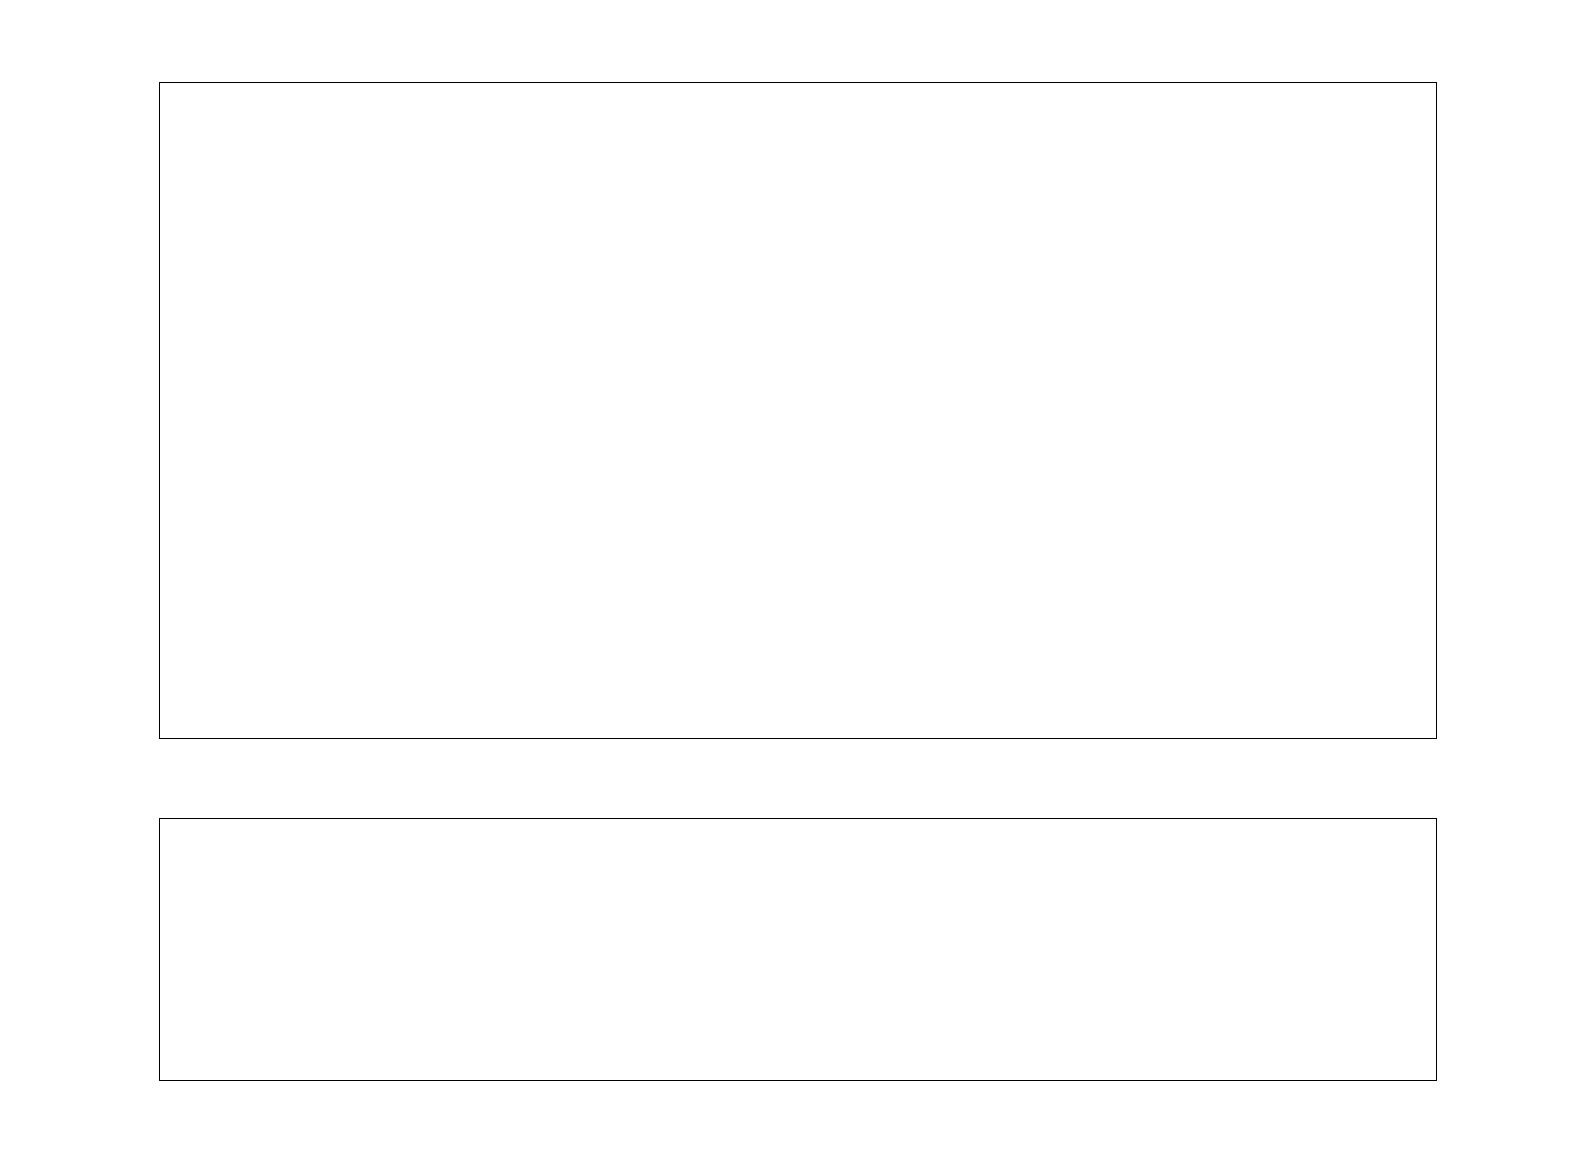

In [14]:
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'
name = '_WireModX'
side_right = 'right'
side_left = 'left'
start = time.time()
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vx_sce','EventWeight','Reco. Nu vertex X position [cm]',-10,270,40,'NuVx_sce'+name,side_left)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vy_sce','EventWeight','Reco. Nu vertex Y position [cm]',-120,120,40,'NuVy_sce'+name,side_left)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut,'Nu_Vz_sce','EventWeight','Reco. Nu vertex Z position [cm]',-50,1050,40,'NuVz_sce'+name,side_left)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut + ' && TrackTheta!=-9','cos(TrackTheta)','EventWeight','cos(theta)',-1,1,20,'costhetaw'+name,side_left)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut + ' && TrackTheta!=-9','TrackPhi','EventWeight','Track Phi',-3.141,3.141,20,'phi'+name,side_left)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','TrackMomMCS_mom','EventWeight','TrackMomMCS_mom',0,1.5,20,'TrackMomMCS_mom'+name,side_right)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NuTracks','EventWeight','Number of Tracks',0,10,10,'NuTracks'+name,side_right)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','NumPfp','EventWeight','Number of Pfparticle',0,10,10,'NumPfp'+name,side_right)
end = time.time()
print(end - start)
NuCC_w.make_stacked_histo_weightV2(cut + ' && 1','TrackLength','EventWeight','Track Length',0,700,20,'TrackLength'+name,side_right)
end = time.time()

In [ ]:
print eff,N_signal,(N_true+0.000001)
print eff_detsys,N_signal_detsys,(N_true_detsys+0.000001)

print 'xsec percent diff MC: ', (sigma_tot_MC-sigma_tot_MC_detsys)/sigma_tot_MC
print 'xsec percent diff: ', (sigma_tot-sigma_tot_detsys)/sigma_tot


In [ ]:
from array import array
mom_bins = [ 0.00, 0.18, 0.30, 0.45, 0.77, 1.28, 2.50 ]
binnum = len(mom_bins) - 1
#h_xsec_mom = ROOT.TH1F('h_xsec_mom','h_xsec_mom',binnum,array('f',mom_bins))

In [ ]:
xstart = 0
xend = 2
xbin = 100
weight_name = 'EventWeight*TunedCentralValue_Genie'
title = 'true moum momentum efficiency'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
#h_init_eff_energy = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy,zahler_cut)
#h_init_eff_energy_1 = fill_histo(globale.overlay_out,'MCNu_Energy',h_init_eff_energy_1,nenner_cut)
detsys_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')
eff =  ROOT.TEfficiency(h_init_eff_energy,h_init_eff_energy_1)
eff.SetStatisticOption(ROOT.TEfficiency.kFCP)#;  // to set option for errors (see ref doc)
eff.SetConfidenceLevel(0.68)
eff.SetTitle(title)
eff.Draw("AP")
ROOT.gPad.Update()
graph = eff.GetPaintedGraph()
graph.SetMinimum(0)
graph.SetMaximum(1)
graph.SetLineWidth(2)
graph.GetXaxis().SetTitle("Truth muon momentum [GeV]")
graph.GetYaxis().SetTitle("Signal efficiency")
graph.Draw("AP")
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_trueMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_trueMom.root")

eff.Write("h_eff_true")

In [ ]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',200,0,2.5,200,0,2.5)
detsys_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
#h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS.png")
h_migration.Write("h2_true_MCS_fine")

In [ ]:
h_migration = ROOT.TH2F("h_migration",'Truth vs. Reco',binnum,array('f',mom_bins),binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy:TrackMomMCS_mom'+'>>h_migration',weight_name+'*('+cut+'&& numu_true)','')
h_migration.SetXTitle("reco Muon momentum MCS [GeV]")
h_migration.SetYTitle("true Muon momentum [GeV]")
h_migration.Draw("colz")
h_migration.Draw("same text")
c1.Draw()
c1.SaveAs(globale.outputdir_root + "h2_true_MCS_bin.root")
c1.SaveAs(globale.outputdir_png + "h2_true_MCS_bin.png")
h_migration.Write("h2_true_MCS_bin")

In [ ]:
reco_entries = [0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
mitigation_matrix = np.zeros((7,6))
for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        reco_entries[j-1]+=h_migration.GetBinContent(i,j)
h_mitigation_matrix = ROOT.TH2F("h_migration",'Migration matrix',7,0,7,6,0,6)
for j in range(1,binnum+1):
    for i in range(1,binnum+2):
        #print 'bin i,j: ', i,j,'Value: ',h_migration.GetBinContent(i,j)
        mitigation_matrix[i-1,j-1]= h_migration.GetBinContent(i,j)/reco_entries[j-1]
        h_mitigation_matrix.SetBinContent(i,j,mitigation_matrix[i-1,j-1])
        #print i-1,j-1,mitigation_matrix[i-1,j-1]
        #true_entries[j]+=h_migration.GetBinContent(i,j)
print mitigation_matrix
np.save(output_filedir+'migration_matrix_momentum',mitigation_matrix)
h_mitigation_matrix.SetXTitle("Reco bin i, 7=overflow")
h_mitigation_matrix.SetYTitle("True bin j")
h_mitigation_matrix.Draw('colz')
h_mitigation_matrix.Draw('same text')

c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_mitigation_matrix.png")
c1.SaveAs(globale.outputdir_root + "h_mitigation_matrix.root")

h_mitigation_matrix.Write("h_mitigation_matrix")

In [ ]:
# Nselected and N generated
title = 'MCS momentum efficiency'
weight_name = 'EventWeight*TunedCentralValue_Genie'
nenner_cut = 'numu_true'
zahler_cut = 'fidVol && muon && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1 && numu_signal'
h_init_eff_energy = ROOT.TH1F("h_init_eff_energy",title,binnum,array('f',mom_bins))
h_init_eff_energy_1 = ROOT.TH1F("h_init_eff_energy_1",title,binnum,array('f',mom_bins))
detsys_out.Draw('MCle_Energy>>h_init_eff_energy',weight_name+'*('+zahler_cut+')')
detsys_out.Draw('MCle_Energy>>h_init_eff_energy_1',weight_name+'*('+nenner_cut+')')

h_init_eff_energy.Write("h_eff_true_energy_z")
h_init_eff_energy_1.Write("h_eff_true_energy_n")

In [ ]:
# e tilde
N_sel = np.zeros((6))
N_gen = np.zeros((6))
Err_sel = np.zeros((6))
Err_gen = np.zeros((6))
for i in range(1,binnum+1):
    N_sel[i-1] = h_init_eff_energy.GetBinContent(i)
    N_gen[i-1] = h_init_eff_energy_1.GetBinContent(i)
    Err_sel[i-1] = h_init_eff_energy.GetBinError(i)
    Err_gen[i-1] = h_init_eff_energy_1.GetBinError(i)
    print N_sel[i-1],N_gen[i-1],N_sel[i-1]/N_gen[i-1]
eff_tilde = np.zeros((6))
eff_tilde = mitigation_matrix.dot(N_sel)/(mitigation_matrix.dot(N_gen))
err_tilde = np.zeros((6))
err_tilde = mitigation_matrix.dot(Err_sel)/(mitigation_matrix.dot(Err_gen))
print eff_tilde
print err_tilde
np.save(output_filedir+'eff_tilde_momentum_xsec_CV',eff_tilde)


In [ ]:
for i in range(1,binnum+1):
    Err_sel[i-1] =  (eff.GetEfficiencyErrorLow(i) +  eff.GetEfficiencyErrorUp(i))/2.0
    print Err_sel[i-1]
    
err_tilde = mitigation_matrix.dot(Err_sel)
print err_tilde

In [ ]:
h_eff_tilde = ROOT.TH1F("h_eff_tilde",'Efficiency tilde',binnum,array('f',mom_bins))
for i in range(1,binnum+1):
    h_eff_tilde.SetBinContent(i,eff_tilde[i-1])
    h_eff_tilde.SetBinError(i,err_tilde[i-1])
h_eff_tilde.SetMaximum(1)
h_eff_tilde.SetMinimum(0)
h_eff_tilde.SetLineWidth(3)
h_eff_tilde.Draw('E1')
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_eff_tilde_xsecMom.png")
c1.SaveAs(globale.outputdir_root + "h_eff_tilde_xsecMom.root")

h_eff_tilde.Write("h_eff_tilde")

In [ ]:
weight_name = 'EventWeight*TunedCentralValue_Genie'
variable = 'TrackMomMCS_mom'
cut = 'fidVol && muon && TrackLength>8 && crt_tom_cut && TrackScore>0.8\
                && TrackLength>20 && TrackPID_chiproton>78 && NuScore>0.1'

h_data = ROOT.TH1F("h_data",'h_data',binnum,array('f',mom_bins))
h_ext = ROOT.TH1F("h_ext",'h_ext',binnum,array('f',mom_bins))
h_dirt = ROOT.TH1F("h_dirt",'h_dirt',binnum,array('f',mom_bins))
h_overlay = ROOT.TH1F("h_overlay",'h_overlay',binnum,array('f',mom_bins))
#h_weight_func_n = ROOT.TH1F("h_weight_func_n",'h_weight_func',binnum,array('f',mom_bins))

globale.data_out.Draw(variable+'>>h_data',cut,'')
globale.ext_out.Draw(variable+'>>h_ext',cut,'')
globale.dirt_out.Draw(variable+'>>h_dirt',weight_name+'*('+cut+')','')
detsys_out.Draw(variable+'>>h_overlay',weight_name+'*('+cut+'&& !numu_signal)','')


In [ ]:
h_data.Sumw2()
h_ext.Sumw2()
h_dirt.Sumw2()
h_overlay.Sumw2()
h_data.Scale(globale.scale[globale.data])
h_ext.Scale(globale.scale[globale.ext])
h_dirt.Scale(globale.scale[globale.dirt])
h_overlay.Scale(scale_out[detsys_out])

h_data.Write("h_data")
h_ext.Write("h_ext")
h_dirt.Write("h_dirt")
h_overlay.Write("h_overlay")

In [ ]:
print h_overlay.GetSumOfWeights()
h_data.Add(h_ext,-1)
h_data.Add(h_dirt,-1)
h_data.Add(h_overlay,-1)
print h_data.GetSumOfWeights()

In [ ]:
h_data.Divide(h_eff_tilde)
h_data.Scale(1.0/(N_tot*beam_flux))

In [ ]:
h_overlay_sig = ROOT.TH1F("h_overlay_sig",'h_overlay',binnum,array('f',mom_bins))
detsys_out.Draw(variable+'>>h_overlay_sig',weight_name+'*('+cut+'&& numu_signal)','')
h_overlay_sig.Scale(globale.scale[globale.overlay])
h_overlay_sig.Divide(h_eff_tilde)
h_overlay_sig.Scale(1.0/(N_tot*beam_flux))

In [ ]:
for i in range(1,binnum+1):
    h_data.SetBinContent(i,h_data.GetBinContent(i)/h_data.GetBinWidth(i))
    h_overlay_sig.SetBinContent(i,h_overlay_sig.GetBinContent(i)/h_overlay_sig.GetBinWidth(i))

In [ ]:
legend = ROOT.TLegend(0.6,0.65,0.9,0.9)
h_overlay_sig.SetLineColor(2)
legend.AddEntry(h_data,'data',"lep");
legend.AddEntry(h_overlay_sig,'MC',"f");
h_data.SetYTitle("d\sigma / dp \quad [cm^2/GeV]")
h_data.SetXTitle("p_{\mu} \quad [GeV]")
h_data.SetLineWidth(3)
h_data.Draw('E1')
h_overlay_sig.SetFillColor(0)
h_overlay_sig.SetLineWidth(3)
h_overlay_sig.Draw('hist same')
legend.Draw()
c1.Draw()
c1.SaveAs(globale.outputdir_png + "h_xsec_corr.png")
c1.SaveAs(globale.outputdir_root + "h_xsec_corr.root")

h_data.Write("h_xsec_data")
h_overlay_sig.Write("h_xsec_MC")